# Handwritten Digit Recognition

Handwritten digit recognition sendiri merupakan kemampuan komputer atau perangkat untuk menerima input berupa digit tulisan tangan dimana dalam proyek ini menggunakan MNIST untuk mendapatkan data. Banyak sekali aplikasi dan teknologi yang telah menerapkan handwritten digit recognition namun dengan akurasi yang bervariasi. Untuk itu perlu adanya penelitian untuk menemukan metode dengan akurasi yang tinggi sehingga dapat meningkatkan kinerja dari handwritten digit recognition yang akan digunakan. Metode SVM disertai dataset MNIST digunakan untuk menganalisis seberapa tinggi akurasi yang didapatkan oleh handwritten digit recognition. Semakin tinggi akurasi maka makin sedikit tingkat error yang dihasilkan sehingga akan 4 menghasilkan kinerja yang lebih baik bagi teknologi atau sistem yang akan diberi handwritten digit recognition tersebut.

Pada proyek ini akan membuat pengenalan digit tulisan tangan dengan menggunakan data MNIST yang diambil dari platform Kaggle dengan ukuran fitur sebesar 784 dan target digit nol sampai sembilan. Tujuan proyek ini adalah melakukan evaluasi mengenai akurasi pengenalan menggunakan SVM pada angka tulisan tangan angka yang didapatkan dari database set MNIST, analysis pengaruh algoritma pengolahan awal gambar terhadap tingkat akurasi dari pengenalan, dan evaluasi mengenai kemungkinan menggunakan algoritma bersangkutan untuk memecahkan masalah teknis yang berkaitan dengan pemrosesan gambar digit tulisan tangan yang kurang jelas

# Import Module

In [1]:
# basic computation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# metric eval
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# save model
import joblib

%matplotlib inline

# Ambil Data

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

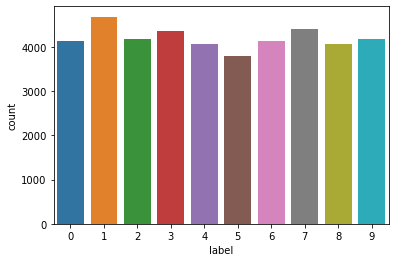

In [5]:
sns.countplot(x='label', data=df)

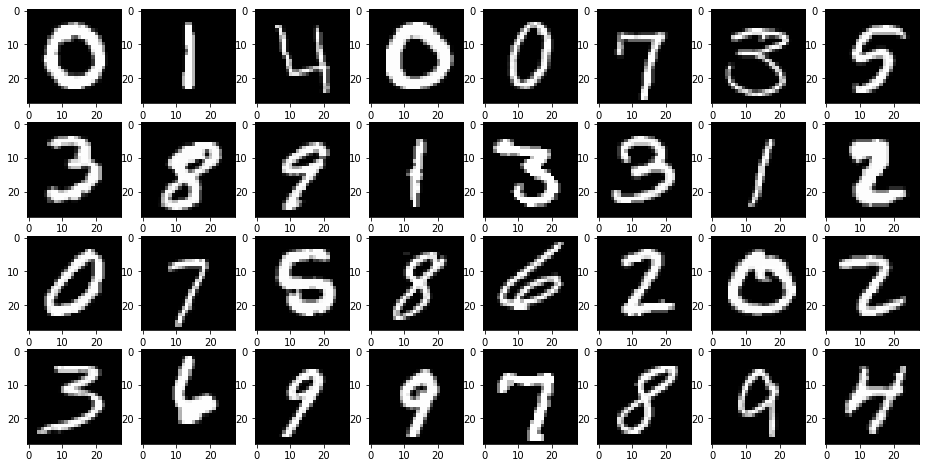

In [6]:
fig = plt.figure(figsize=(16, 8))
columns = 8
rows = 4
for i in range(1, columns*rows +1):
    img = np.array(df.iloc[i, 1:]).reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Cek Null Data 

In [7]:
df.isnull().sum().max()

0

# Cek Duplicated Data 

In [8]:
df.duplicated().any()

False

In [9]:
df.iloc[:, 1:].duplicated().any()

False

# Split Data Prediktor dan Data Target

In [10]:
X_df = df.iloc[:, 1:]
X_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_df = df.iloc[:, 0:1]
y_df.head()

,label
0,1
1,0
2,1
3,4
4,0


# Mengubah Tipe Data Prediktor Menjadi Float dan Target Menjadi Int

In [12]:
X_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [13]:
X_df = X_df.astype('float')
X_arr = X_df.to_numpy()
X_arr.dtype

dtype('float64')

In [14]:
y_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [15]:
y_df = y_df.astype('category')
y_arr = y_df.to_numpy().T[0]
y_arr.dtype

dtype('int64')

# Resizing Gambar

In [16]:
np.sqrt(X_arr.shape[1])

28.0

ukuran gambar telah 28x28 piksel tidak perlu diperkecil lagi

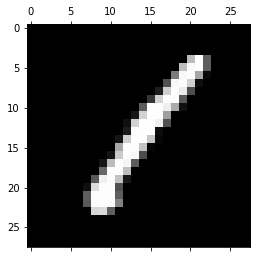

In [17]:
plt.matshow(X_arr[0].reshape((28,28)), cmap='gray', vmin=0, vmax=255)

# Data Visualization

gambaran visualisasi data dengan mereduksi fitur menggunakan Principal Component Analysis

<AxesSubplot:>

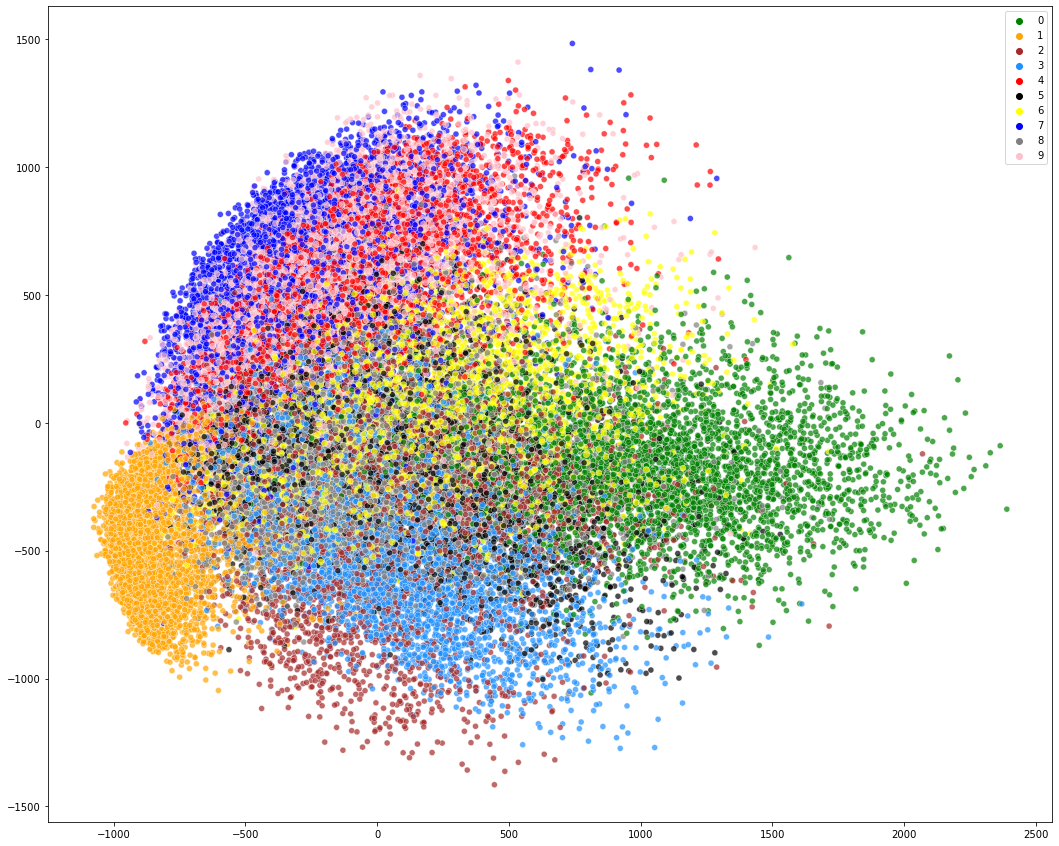

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_arr)

palatte = ['green','orange','brown','dodgerblue','red', 'black', 'yellow', 'blue', 'gray', 'pink']

plt.figure(figsize=(18,15))
sns.scatterplot(x=X_pca.T[0], y=X_pca.T[1], hue=y_arr,
                palette=palatte, 
                alpha=0.7, legend='full')

# Feature Scaling 

feature scaling menggunakan standardization agar untuk data input yang baru tidak akan terpengaruh

In [19]:
scaler = StandardScaler().fit(X_arr)
X_scale = scaler.transform(X_arr)

# Split Data Training dan Data Testing

Data training dan data testing dibagi berdasarkan rasio 80% : 20% dengan nilai random state 42

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_arr, train_size=0.8, test_size=0.2, random_state=42)

In [21]:
print("Data Training : ", X_train.shape)
print("Data Training : ", y_train.shape)
print("Data Testing : ", X_test.shape)
print("Data Testing : ", y_test.shape)

Data Training :  (33600, 784)
Data Training :  (33600,)
Data Testing :  (8400, 784)
Data Testing :  (8400,)


# Membangun Model

Model dibangun dan dipilih menggunakan metode Grid Search CV yang sudah tersedia k-fold cross validation dengan tuning paramater C & Gamma model Support Vector Machine kernel Radial Basis Function

parameter yang di-tuning yaitu:
- C : [0.3, 0.6, 1, 3, 6, 10]
- gamma : ['scale', 'auto']

    - _gamma 'scale' = 1 / (n_features * X.var())_
    - _gamma 'auto' = 1 / n_features_

nilai k pada cross val yaitu 3

In [22]:
model_file = "grid_search_model.pkl"

# Load Model
model = joblib.load(model_file)

In [23]:
# # Training Model
# params = {'C': [0.3, 0.6, 1, 3, 6, 10],
#          'gamma': ['scale', 'auto']}
# model = GridSearchCV(estimator=SVC(), param_grid=params, cv=3, verbose=3)
# model.fit(X_train, y_train)

In [24]:
model_results_df = pd.DataFrame(model.cv_results_)
model_results_df = model_results_df.sort_values(by=['rank_test_score'])
model_results_df = (
    model_results_df
    .set_index(model_results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
model_results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
6_auto,"{'C': 6, 'gamma': 'auto'}",1,0.961399,0.000084
10_auto,"{'C': 10, 'gamma': 'auto'}",2,0.961101,0.000223
10_scale,"{'C': 10, 'gamma': 'scale'}",3,0.961071,0.000695
6_scale,"{'C': 6, 'gamma': 'scale'}",4,0.960923,0.000719
3_auto,"{'C': 3, 'gamma': 'auto'}",5,0.960714,0.000219
3_scale,"{'C': 3, 'gamma': 'scale'}",6,0.960565,0.000730
1_scale,"{'C': 1, 'gamma': 'scale'}",7,0.953720,0.000995
1_auto,"{'C': 1, 'gamma': 'auto'}",8,0.953690,0.000870
0.6_auto,"{'C': 0.6, 'gamma': 'auto'}",9,0.947232,0.002274


In [25]:
model.best_estimator_

SVC(C=6, gamma='auto')

In [26]:
model.best_score_

0.9613988095238094

In [27]:
# # Save Model
# joblib.dump(model, model_file)

**kesimpulan :** 

hasil dari proses tuning menggunakan GridSearchCV yaitu model yang paling optimal menggunakan **SVM RBF dengan paramater C=6, gamma='auto'** dengan nilai score pada data validation sebesar 96.13%

# Metric Evaluation

metric evaluation dilakukan menggunakan confusion matrix dan perhitungan performa hanya berfokus pada tingkat akurasi pada tiap digit

In [28]:
y_pred = model.predict(X_test)

In [29]:
conf_m = confusion_matrix(y_test, y_pred)
conf_m

array([[802,   0,   3,   0,   0,   1,   9,   0,   1,   0],
       [  0, 894,   9,   1,   1,   1,   0,   1,   1,   1],
       [  2,   4, 822,   4,   2,   0,   4,   2,   5,   1],
       [  0,   0,  12, 894,   0,  10,   0,   6,  10,   5],
       [  1,   1,   7,   0, 811,   1,   5,   2,   0,  11],
       [  1,   1,   6,  11,   1, 668,  10,   2,   2,   0],
       [  4,   1,  11,   0,   1,   2, 763,   0,   3,   0],
       [  0,   3,  11,   3,   6,   3,   0, 860,   0,   7],
       [  1,   3,   8,   9,   4,   7,   2,   2, 796,   3],
       [  1,   1,   5,   6,   8,   4,   0,  12,   2, 799]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Plot')

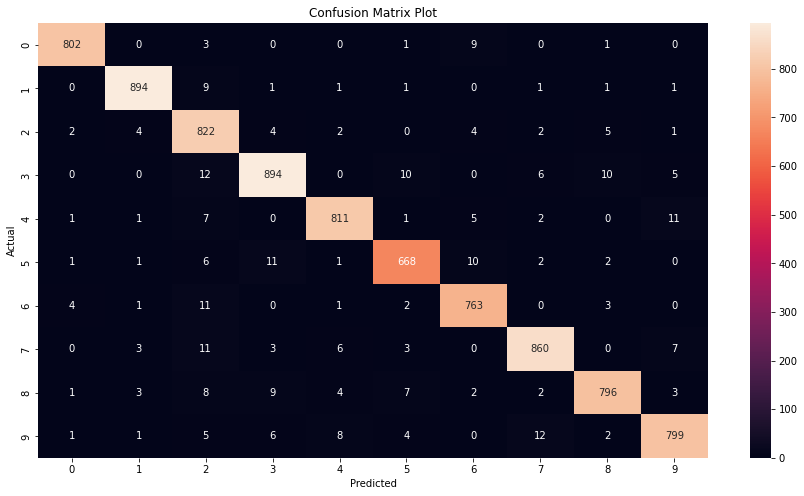

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_m, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")

In [31]:
print("Classification Report secara sederhana:")
print(classification_report(y_test, y_pred))

Classification Report secara sederhana:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       816
           1       0.98      0.98      0.98       909
           2       0.92      0.97      0.94       846
           3       0.96      0.95      0.96       937
           4       0.97      0.97      0.97       839
           5       0.96      0.95      0.95       702
           6       0.96      0.97      0.97       785
           7       0.97      0.96      0.97       893
           8       0.97      0.95      0.96       835
           9       0.97      0.95      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



#### menyimpulkan hasil akurasi setiap digit dan total

In [32]:
# akurasi per setiap digit
dig_accuracy = np.arange(11).astype('float64')

for i in range(10) :
    dig_accuracy[i] = conf_m[i,i] / sum(conf_m[i]) * 100
    dig_accuracy[i] = round(dig_accuracy[i], 2)

#akurasi keseluruhan
dig_accuracy[10] = round(accuracy_score(y_test, y_pred) *100)
dig_accuracy

array([98.28, 98.35, 97.16, 95.41, 96.66, 95.16, 97.2 , 96.3 , 95.33,
       95.35, 97.  ])

In [33]:
df_accuracy = pd.DataFrame({"Label":[0,1,2,3,4,5,6,7,8,9,"Total"], "Accuracy":dig_accuracy}).set_index("Label")

df_accuracy

,Accuracy
Label,
0,98.28
1,98.35
2,97.16
3,95.41
4,96.66
5,95.16
6,97.20
7,96.30
8,95.33


## Kesimpulan : Akurasi setiap digit berada diatas 95% dan akurasi keseluruhan sebesar 96%. 

# Input Prediksi File Eksternal

Mencoba ambil file gambar dari luar untuk diprediksi

E:/Course Practice/Python/Digit Recognition/dataset/sample/3-4.png
Digit Hasil Prediksi : 3


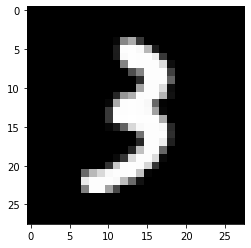

In [34]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display
import cv2

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(b.files[0]) # Print the list of files selected.
    a = b.files
    predict_files(b.files[0])


def predict_files(file):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    
    img = img.flatten()
    img = img.reshape(1,-1)
    img = scaler.transform(img)

    classes = model.predict(img)
    print("Digit Hasil Prediksi :", classes[0])
    

fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)